In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the data
df = pd.read_csv('/LT.NS.csv')
data = df

In [30]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-03,1895.000000,1937.449951,1893.650024,1922.849976,1894.265625,1906676
1,2022-01-04,1922.849976,1943.000000,1914.550049,1937.550049,1908.747070,1643920
2,2022-01-05,1940.699951,1951.000000,1927.650024,1948.599976,1919.632812,1711667
3,2022-01-06,1944.500000,1953.000000,1919.599976,1924.500000,1895.891113,1372015
4,2022-01-07,1929.050049,1934.949951,1897.150024,1904.900024,1876.582520,1447123
...,...,...,...,...,...,...,...
511,2024-01-25,3599.899902,3618.250000,3564.800049,3593.449951,3593.449951,2206540
512,2024-01-29,3604.000000,3733.850098,3600.100098,3708.000000,3708.000000,2072982
513,2024-01-30,3715.949951,3737.899902,3624.899902,3633.300049,3633.300049,1454989
514,2024-01-31,3520.000000,3538.000000,3387.050049,3479.750000,3479.750000,9637606


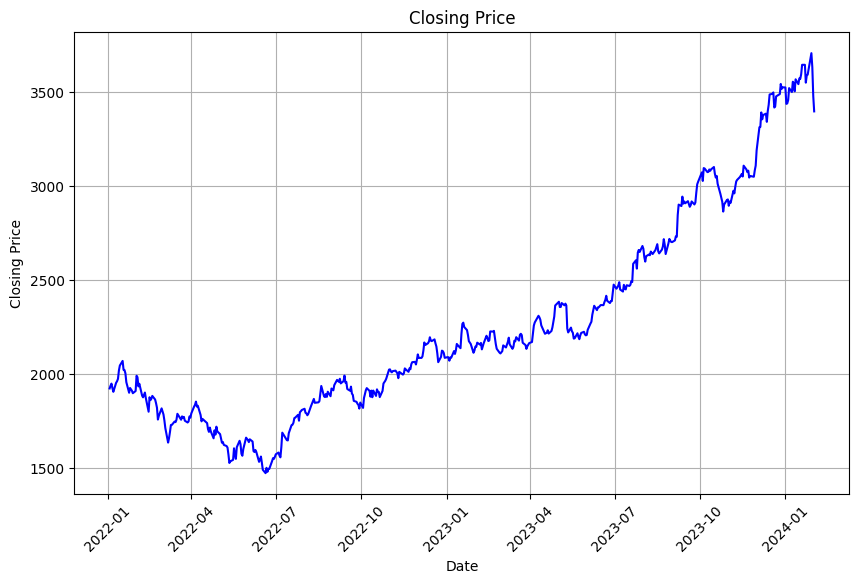

In [32]:
df['Date'] = pd.to_datetime(df['Date'])
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], color='blue')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [15]:
# Split the data into features and target
y = data['Close']
X = data.drop(columns=['Date', 'Close'], axis=1)


In [16]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
# Train an XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, booster='gbtree')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [18]:
# Predict on the test set
y_pred = model.predict(X_test)


In [19]:
# Add predicted prices to test data
predicted_prices = X_test.copy()
predicted_prices['Close'] = y_pred


In [20]:
# Calculate evaluation metrics
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
explained_var = explained_variance_score(y_test, y_pred)

# Print the evaluation metrics and directional accuracy
print("MAPE:", mape)
print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("Mean absolute error:", mae)
print("R-squared:", r2)
print("Explained variance:", explained_var)


MAPE: 0.005523256596424297
Mean squared error: 440.6325844672434
Root mean squared error: 20.991250188286628
Mean absolute error: 12.78890521709734
R-squared: 0.998680273587549
Explained variance: 0.998808273318482


In [21]:
# Predict the next day close
next_day = X.tail(1)
next_day_pred = model.predict(next_day)
next_day_close = next_day_pred[0]
print("Next day predicted close:", next_day_close)


Next day predicted close: 3398.1218


Prediction for the day 1  is: 3398.1218
Prediction for the day 2  is: 3479.7307
Prediction for the day 3  is: 3633.3237
Prediction for the day 4  is: 3579.0825
Prediction for the day 5  is: 3580.3223
Prediction for the day 6  is: 3589.0361
Prediction for the day 7  is: 3551.22
Prediction for the day 8  is: 3584.3396
Prediction for the day 9  is: 3582.502
Prediction for the day 10  is: 3580.5398
Prediction for the day 11  is: 3570.9387
Prediction for the day 12  is: 3573.3943
Prediction for the day 13  is: 3553.1624
Prediction for the day 14  is: 3550.5425
Prediction for the day 15  is: 3504.9507
Prediction for the day 16  is: 3542.1792
Prediction for the day 17  is: 3556.0232
Prediction for the day 18  is: 3501.0027
Prediction for the day 19  is: 3521.774
Prediction for the day 20  is: 3458.4827
Prediction for the day 21  is: 3440.7961
Prediction for the day 22  is: 3438.2166
Prediction for the day 23  is: 3525.2615
Prediction for the day 24  is: 3526.5286
Prediction for the day 25  is

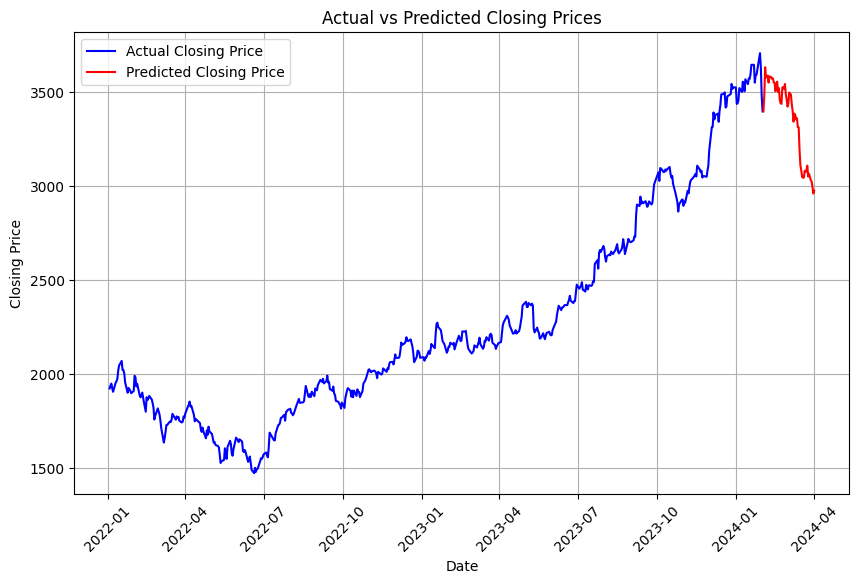

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])
predicted_values = []

# Predict the next 60 days
for i in range(1, 61):
    next_day = X.tail(i)
    next_day_pred = model.predict(next_day)
    next_day_close = next_day_pred[0]
    predicted_values.append(next_day_close)
    print("Prediction for the day", i, " is:", next_day_close)

# Plotting the actual and predicted closing prices
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Actual Closing Price', color='blue')
predicted_dates = pd.date_range(start=df['Date'].max(), periods=61)[1:]
plt.plot(predicted_dates, predicted_values, label='Predicted Closing Price', color='red')

plt.title('Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()